In [1]:
import pandas as pd
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder.appName("DataExploration").getOrCreate()

pd.options.display.max_columns = None
pd.options.display.max_rows = 250
pd.options.display.max_colwidth = 150
sns.set(color_codes=True)

schema = "polarity FLOAT, id LONG, date_time STRING, query STRING, user STRING, text STRING"

IN_PATH_1 = "/home/jovyan/data-sets/sentiment-140-training-data/testdata.manual.2009.06.14.csv"
IN_PATH_2 = "/home/jovyan/data-sets/sentiment-140-training-data/training.1600000.processed.noemoticon.csv"
OUT_PATH = "/home/jovyan/data-sets/sentiment-140-training-data/RAW"

spark_reader = spark.read.schema(schema)

In [2]:
test_data = spark_reader.csv(IN_PATH_1, header=False).cache()
training_data = spark_reader.csv(IN_PATH_2, header=False).cache()


In [13]:
test_data.count()

498

In [14]:
training_data.count()

1600000

In [18]:
df = training_data.select("polarity").na.drop()

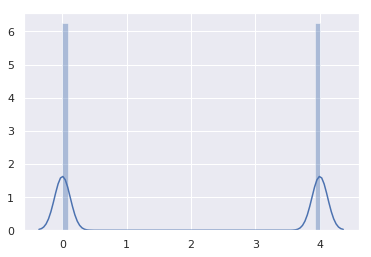

In [19]:
sns.distplot(df.toPandas())

In [21]:
training_data.groupBy("polarity").count().toPandas()

,polarity,count
0,4.0,800000
1,0.0,800000


In [23]:
training_data.select("text").na.drop().count()

1600000

In [24]:
training_data.summary().toPandas()

,summary,polarity,id,date_time,query,user,text
0,count,1600000,1600000,1600000,1600000,1600000,1600000
1,mean,2.0,1.9988175522956276E9,None,None,4.325887521835714E9,None
2,stddev,2.000000625000293,1.935760736226725E8,None,None,5.1627332184548904E10,None
3,min,0.0,1467810369,Fri Apr 17 20:30:31 PDT 2009,NO_QUERY,000catnap000,exhausted
4,25%,0.0,1956925281,None,None,32508.0,None
5,50%,0.0,2002102801,None,None,130587.0,None
6,75%,4.0,2177050908,None,None,1100101.0,None
7,max,4.0,2329205794,Wed May 27 07:27:38 PDT 2009,NO_QUERY,zzzzeus111,�����ߧ�ǿ�����ж�؜��� &lt;&lt;----I DID NOT KNOW I CUD or HOW TO DO ALL DAT ON MY PHONE TIL NOW. WOW..MY LIFE IS NOW COMPLETE. JK.


In [4]:
training_data.repartition(20).write.partitionBy("polarity").csv(OUT_PATH, mode="overwrite")